# tvec using LogReg

In [2]:
# imports
import pandas as pd
import numpy as np
from sklearn.model_selection import cross_val_score, train_test_split, GridSearchCV

In [3]:
from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer
from sklearn.linear_model import LogisticRegression
import json

In [4]:
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

In [5]:
from sklearn.pipeline import Pipeline

In [6]:
from sklearn.neighbors import KNeighborsClassifier

In [7]:
import seaborn as sns
import matplotlib.pyplot as plt

In [8]:
# load df's
bb = pd.read_csv('../df_csv/bbfinal.csv')
bcs = pd.read_csv('../df_csv/bcsfinal.csv')

In [9]:
# check head
bb.head()

,author,created_utc,downs,num_comments,score,selftext,title,ups,subreddit,all_text
0,Ashutosh1947,2019-07-07 12:03:45,0,6,188,NaN,Los pollos shifts towards noodles from chicken,188,1,Los pollos shifts towards noodles from chicken
1,Rykedan,2019-07-06 17:44:03,0,25,1875,NaN,Pretty cool Thought you guys would appreciated...,1875,1,Pretty cool Thought you guys would appreciated...
2,Burnnoticelover,2019-07-07 03:01:46,0,17,269,NaN,The ending we got was perfect but it would hav...,269,1,The ending we got was perfect but it would hav...
3,spillthetea13,2019-07-07 13:24:13,0,2,21,Its like a kitchen nightmare episode but inste...,Breaking bad movie idea,21,1,Breaking bad movie idea Its like a kitchen nig...
4,pretentiousiscool,2019-07-07 15:50:31,0,0,10,NaN,lmao,10,1,lmao


In [10]:
# check head
bcs.head()

,author,created_utc,downs,num_comments,score,selftext,title,ups,subreddit,all_text
0,skinkbaa,2018-11-11 07:52:32,0,251,296,A few people requested this thread Feel fre...,Breaking Bad Movie Prediction Thread,296,0,Breaking Bad Movie Prediction Thread A few p...
1,skinkbaa,2019-05-05 22:23:21,0,98,88,What do you think will happen next season Feel...,Better Call Saul Season 5 Official Predictio...,88,0,Better Call Saul Season 5 Official Predictio...
2,snarfje,2019-07-07 09:20:38,0,36,944,NaN,Saw this gentlemen on a foodtruck festival i...,944,0,Saw this gentlemen on a foodtruck festival i...
3,RrentTreznor,2019-07-06 21:50:07,0,35,404,NaN,Cherished family heirloom finally has made its...,404,0,Cherished family heirloom finally has made its...
4,Ashutosh1947,2019-07-07 16:12:49,0,0,1,NaN,Oc,1,0,Oc


In [11]:
# combine df's into one large one
data = pd.concat(objs=[bcs[['all_text', 'subreddit', 'num_comments', 'score']], bb[['all_text', 'subreddit', 'num_comments', 'score']]], ignore_index=True)

In [12]:
# check number of 1's and 0's in target
data['subreddit'].value_counts(normalize=True)

1    0.513871
0    0.486129
Name: subreddit, dtype: float64

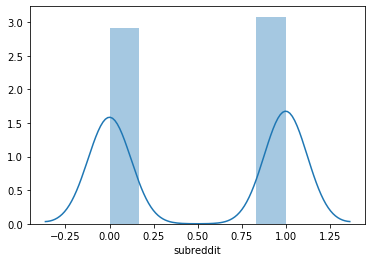

In [13]:
# dist of 1's and 0's
sns.distplot(data['subreddit'])

In [68]:
# remove numbers from text
# data['all_text'] = data['all_text'].str.replace('\d+', '')

In [14]:
# set X and y variables
X = data['all_text']
y = data['subreddit']

In [15]:
# train test split
X_train, X_test, y_train, y_test = train_test_split(X, y, stratify=y, test_size=0.3, random_state=42)

In [16]:
# pipeline

pipe = Pipeline([
    ('tvec', TfidfVectorizer()),
    ('lr', LogisticRegression())
])

In [17]:
# evaluate on unseen data
cross_val_score(pipe, X_train, y_train, cv=5).mean()

/Users/mariosanchez/anaconda3/envs/dsi/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


0.7810810810810811

In [17]:
# gridsearch for best parameters

pipe_params = {
    'tvec__max_features':[3000, 3500, 4000],
    'tvec__min_df':[2, 3],
    'tvec__max_df':[.9, .95],
    'tvec__ngram_range':[(1,1),(1,2)],
    'tvec__stop_words':[None, 'english'],
    'lr__penalty':['l1','l2'],
    'lr__C':[.1, 1, 10],
    
}

gs = GridSearchCV(pipe, param_grid=pipe_params, cv=5)
gs.fit(X_train, y_train)
print(gs.best_score_)
gs.best_params_

/Users/mariosanchez/anaconda3/envs/dsi/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


0.7963963963963964


{'lr__C': 1,
 'lr__penalty': 'l2',
 'tvec__max_df': 0.9,
 'tvec__max_features': 3500,
 'tvec__min_df': 2,
 'tvec__ngram_range': (1, 2),
 'tvec__stop_words': 'english'}

In [18]:
# accuracy score on train data
gs.score(X_train, y_train)

0.9387387387387387

In [19]:
# accuracy score on test data
gs.score(X_test, y_test)

0.7794117647058824

## Fit model with optimal parameters

In [18]:
tvec = TfidfVectorizer(max_df= 0.9,
 max_features= 3500,
 min_df= 2,
 ngram_range= (1, 2),
 stop_words= 'english')

In [19]:
X_train_vec = tvec.fit_transform(X_train)
X_test_vec = tvec.transform(X_test)

In [20]:
lr = LogisticRegression(
    C=1,
    penalty='l2'
)

In [21]:
lr.fit(X_train_vec, y_train)

LogisticRegression(C=1, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='warn', n_jobs=None, penalty='l2',
                   random_state=None, solver='warn', tol=0.0001, verbose=0,
                   warm_start=False)

In [22]:
# get predictions
predictions = lr.predict(X_test_vec)

In [23]:
# create confusion matrix
cm = confusion_matrix(y_test, predictions)

In [25]:
# print report
print(classification_report(predictions, y_test))

              precision    recall  f1-score   support

           0       0.71      0.81      0.76       200
           1       0.85      0.75      0.80       276

    accuracy                           0.78       476
   macro avg       0.78      0.78      0.78       476
weighted avg       0.79      0.78      0.78       476



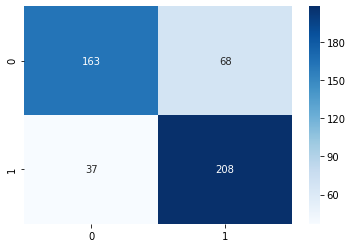

In [26]:
# adapted from stackoverflow
# plot confusion matrix
ax= plt.subplot()
sns.heatmap(cm, annot=True, ax = ax, cmap='Blues', fmt='g'); #annot=True to annotate cells

In [220]:
# create a list of word counts to plot
train_list = list(zip(cvec.get_feature_names(), X_train_vec.toarray().sum(axis=0)))

In [177]:
# create a list of coefficients
coef_list = list(zip(cvec.get_feature_names(), np.exp(lr.coef_).mean(axis=0)))

In [221]:
# convert to dataframe
train_list = pd.DataFrame(train_list, columns=['word', 'word_count'])

In [245]:
train_list

,word,word_count
0,10,16
1,10 episodes,2
2,10 minutes,2
3,100,3
4,1000,2
5,11,3
6,13,2
7,15,3
8,15 breaking,2
9,1997,2


In [184]:
# convert to dataframe
coef_list = pd.DataFrame(coef_list, columns=['word', 'coeffs'])

In [185]:
# get only the 15 highest coefficients
coef_top_15 = coef_list.sort_values(by='coeffs', ascending=False).head(15)

In [223]:
# get only the 15 most frequent words
top_15 = train_list.sort_values(by='word_count', ascending=False).head(15)

In [218]:
# get only the 15 least frequent words
bottom_15 = train_list.sort_values(by='word_count').head(15)

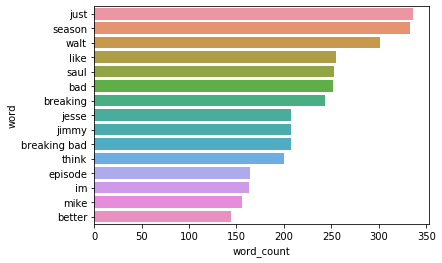

In [224]:
sns.barplot('word_count', 'word', data=top_15, orient='h')

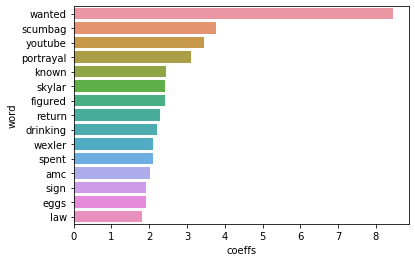

In [187]:
sns.barplot('coeffs', 'word', data=coef_top_15, orient='h')